# Importación de Librerias

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de los datos del CSV sobre el clima sacado de SENAMHI

Faltaria calcular lo mismo pero con todos los datos de los meses

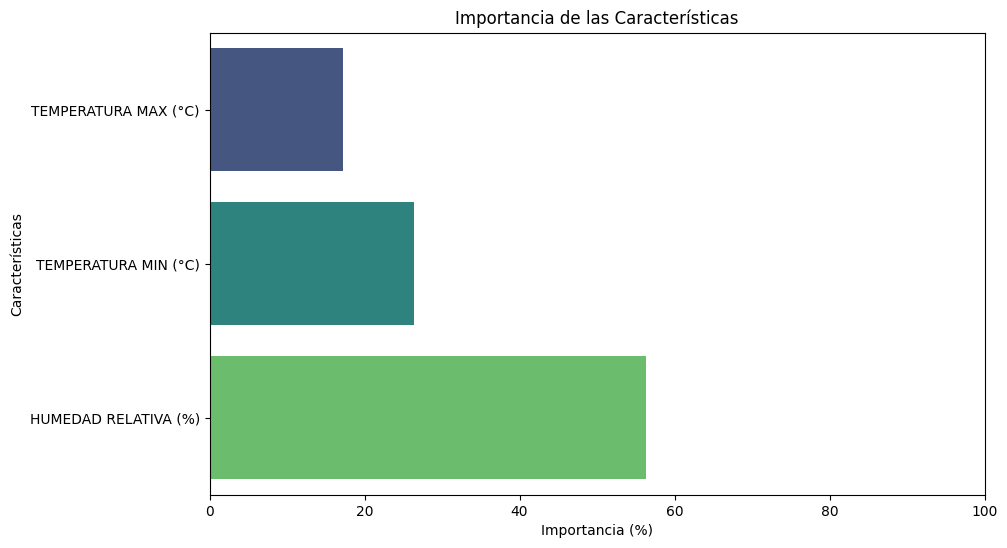

In [9]:
df = pd.read_csv('./Datos HidroMeteorologicos/CSV/datos-general.csv')

# Asegurarse de que las columnas están correctamente nombradas
df.columns = ['AÑO / MES / DÍA', 'TEMPERATURA MAX (°C)', 'TEMPERATURA MIN (°C)', 'HUMEDAD RELATIVA (%)', 'PRECIPITACIÓN (mm/día)']

# Reemplazar 'T' por un valor pequeño y convertir a numérico
df['PRECIPITACIÓN (mm/día)'] = df['PRECIPITACIÓN (mm/día)'].replace('T', 0.05).replace('-887.6', 0).astype(float)

# Seleccionar las columnas relevantes
df_relevant = df[['TEMPERATURA MAX (°C)', 'TEMPERATURA MIN (°C)', 'HUMEDAD RELATIVA (%)', 'PRECIPITACIÓN (mm/día)']]

# Eliminar filas con valores faltantes
df_relevant = df_relevant.dropna()

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_relevant[['TEMPERATURA MAX (°C)', 'TEMPERATURA MIN (°C)', 'HUMEDAD RELATIVA (%)']]
y = df_relevant['PRECIPITACIÓN (mm/día)']

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_
features = ['TEMPERATURA MAX (°C)', 'TEMPERATURA MIN (°C)', 'HUMEDAD RELATIVA (%)']

# Normalizacion
importances_normalized = importances * 100

# Crear un DataFrame para las importancias normalizadas
importance_df = pd.DataFrame({
    'Características': features,
    'Importancia (%)': importances_normalized
})

# Gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (%)', y='Características', hue='Características', data=importance_df, palette='viridis', dodge=False)
plt.xlabel('Importancia (%)')
plt.title('Importancia de las Características')
plt.xlim(0, 100)  # Establecer el límite del eje x de 0 a 100
plt.show()